<a href="https://colab.research.google.com/github/Byankap/Neural_Network_Charity_Analysis/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

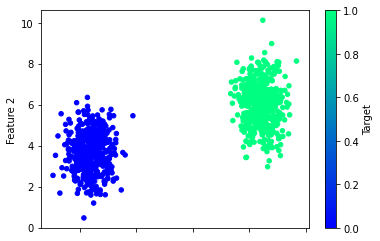

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")


In [3]:
#use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=78)

In [4]:
#create scaler instance
X_scaler=skl.preprocessing.StandardScaler()

#fit the scaler
X_scaler.fit(X_train)

#fit the scaler
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [5]:
#create the Keras Sequential model
nn_model=tf.keras.models.Sequential()
#add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

In [6]:
#add the output layer that uses a probability activation funciton
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [7]:
#check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
#compile the Sequential model together and customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
#Fit the model to the training data
fit_model=nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 2s 3ms/step - loss: 0.9360 - accuracy: 0.0120
Epoch 2/100
24/24 [==============================] - 0s 6ms/step - loss: 0.8990 - accuracy: 0.0267
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8664 - accuracy: 0.0520
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8384 - accuracy: 0.0867
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8147 - accuracy: 0.1307
Epoch 6/100
24/24 [==============================] - 0s 5ms/step - loss: 0.7954 - accuracy: 0.1720
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7792 - accuracy: 0.2053
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7661 - accuracy: 0.2467
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.7549 - accuracy: 0.2827
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7451 - accuracy: 0.3093
Epoch 11/

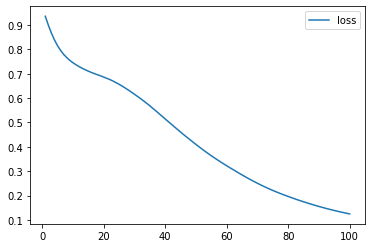

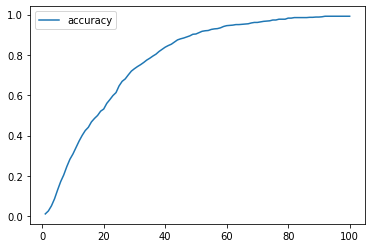

In [10]:
#create a DataFrame containing training history
history_df=pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history['loss'])+1))

#plot the loss
history_df.plot(y='loss')

#plot the accuracy
history_df.plot(y='accuracy')

In [11]:
#evaluate the model using the test data 
model_loss, model_accuracy=nn_model.evaluate(X_test_scaled,y_test, verbose=2)
print(f'loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.1144 - accuracy: 1.0000 - 156ms/epoch - 19ms/step
loss: 0.11444918811321259, Accuracy: 1.0


In [12]:
#predict the classification of a new set of blob data
new_X, new_Y=make_blobs(n_samples=10, centers=2, n_features=2,random_state=78)
new_X_scaled=X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled)>0.5).astype('int32')

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

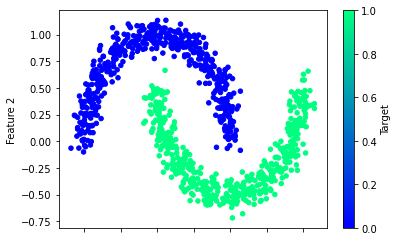

In [13]:
#shifting from single-neuron, single-layer model to nonlinear data
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [14]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [15]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3939 - accuracy: 0.3307
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1928 - accuracy: 0.3547
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0570 - accuracy: 0.3867
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.4133
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8999 - accuracy: 0.4427
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8503 - accuracy: 0.4680
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8113 - accuracy: 0.5000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7788 - accuracy: 0.5240
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7521 - accuracy: 0.5467
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7294 - accuracy: 0.5587
Epoch 11/

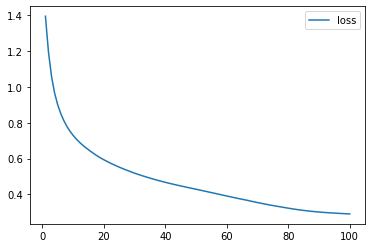

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

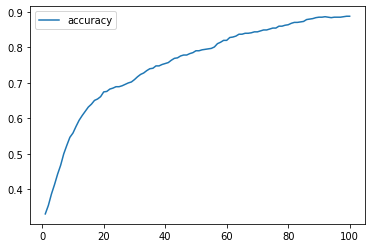

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")

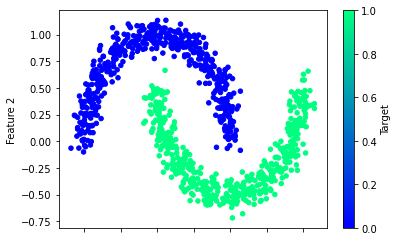

In [18]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2901 - accuracy: 0.8880
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2894 - accuracy: 0.8893
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2887 - accuracy: 0.8880
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.8907
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8907
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8893
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8893
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8893
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8907
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8920
Epoch 11/

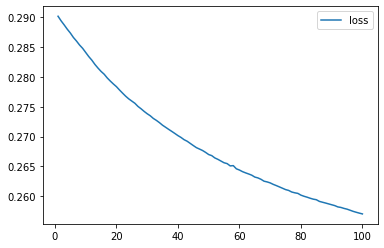

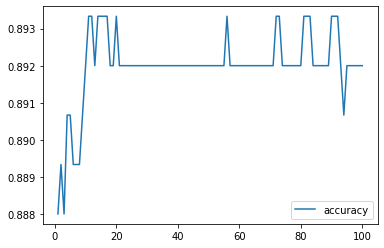

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

# Plot the accuracy
history_df.plot(y="accuracy")

In [22]:
#generate new Sequential model
new_model=tf.keras.models.Sequential()

In [23]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [24]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6974 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6532 - accuracy: 0.4613
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6131 - accuracy: 0.5533
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5773 - accuracy: 0.7227
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7760
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5143 - accuracy: 0.7893
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4875 - accuracy: 0.8067
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4632 - accuracy: 0.8253
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8360
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4221 - accuracy: 0.8373
Epoch 11/

In [26]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("/content/ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

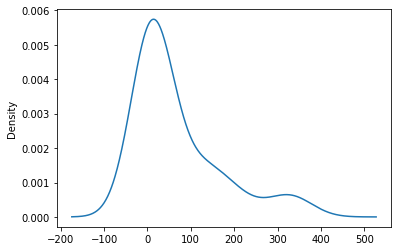

In [27]:
# Visualize the value counts
country_counts.plot.density()

In [28]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [29]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
#standardization Practice
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [33]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
scaler.fit(hr_df)

# Scale the data
scaled_data = scaler.transform(hr_df)


# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656


In [35]:
#DeepLearning_Tabular
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('HR-Employee-Attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [36]:
# Generate our categorical variable list
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [37]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [38]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Attrition_No,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [39]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [40]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [42]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 448       
                                                                 
 dense_5 (Dense)             (None, 5)                 45        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 2ms/step - loss: 93.0165 - accuracy: 0.7541
Epoch 2/100
35/35 [==============================] - 0s 2ms/step - loss: 53.2967 - accuracy: 0.7405
Epoch 3/100
35/35 [==============================] - 0s 2ms/step - loss: 38.3718 - accuracy: 0.7223
Epoch 4/100
35/35 [==============================] - 0s 2ms/step - loss: 28.6759 - accuracy: 0.7323
Epoch 5/100
35/35 [==============================] - 0s 2ms/step - loss: 22.9894 - accuracy: 0.7323
Epoch 6/100
35/35 [==============================] - 0s 2ms/step - loss: 15.5959 - accuracy: 0.7278
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 9.9624 - accuracy: 0.7205
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 6.6876 - accuracy: 0.7486
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 5.6291 - accuracy: 0.7178
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 3.6810 - accuracy: 0.7405
Epo

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 1.8729 - accuracy: 0.8587 - 245ms/epoch - 20ms/step
Loss: 1.8729221820831299, Accuracy: 0.8586956262588501


In [46]:
#logic regression and basic neural network models
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome
X = diabetes_df.drop(columns="Outcome")

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [48]:
# Preprocess numerical data for neural network

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [49]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=200)

# Train the model
log_classifier.fit(X_train,y_train)

# Evaluate the model
y_pred = log_classifier.predict(X_test)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.729


In [50]:
# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


Epoch 1/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7319 - accuracy: 0.4497
Epoch 2/50
18/18 [==============================] - 0s 2ms/step - loss: 0.7048 - accuracy: 0.5174
Epoch 3/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6813 - accuracy: 0.6076
Epoch 4/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6601 - accuracy: 0.6458
Epoch 5/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6405 - accuracy: 0.6788
Epoch 6/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6218 - accuracy: 0.7066
Epoch 7/50
18/18 [==============================] - 0s 1ms/step - loss: 0.6041 - accuracy: 0.7222
Epoch 8/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7361
Epoch 9/50
18/18 [==============================] - 0s 1ms/step - loss: 0.5706 - accuracy: 0.7517
Epoch 10/50
18/18 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7622
Epoch 11/50
18/18 [